In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
ds=pd.read_csv('C:\\Users\\Admin\\excel\\OnlineRetail.csv',encoding='latin1')

In [11]:
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [13]:
ds.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [17]:
ds.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [21]:
ds.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
ds['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [29]:
ds['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [31]:
ds.dropna(inplace=True)

In [33]:
ds.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [35]:
ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [41]:
ds['Total Amount Spent']= ds['Quantity'] * ds['UnitPrice']

total_amt = ds['Total Amount Spent'].groupby(ds['CustomerID']).sum()
total_amt = pd.DataFrame(total_amt).reset_index()
total_amt.head()

,CustomerID,Total Amount Spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [45]:
transactions = ds['InvoiceNo'].groupby(ds['CustomerID']).count()
transaction = pd.DataFrame(transactions).reset_index()
transaction.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [51]:
last_transaction = ds['InvoiceDate'].max()
ds['Last_transact'] = last_transaction - ds['InvoiceDate']
Last_T = ds.groupby(ds['CustomerID']).min()['Last_transact']
Last_T = pd.DataFrame(Last_T).reset_index()
Last_T.head()

,CustomerID,Last_transact
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [61]:
data = pd.merge(total_amt, transaction, how='inner', on='CustomerID')
data = pd.merge(data, Last_T, how='inner', on='CustomerID')

In [77]:
print(data[['Total Amount Spent', 'InvoiceNo', 'Last_transact']].dtypes)

Total Amount Spent            float64
InvoiceNo                       int64
Last_transact         timedelta64[ns]
dtype: object


In [75]:
data['Last_transact_days'] = data['Last_transact'].dt.days

In [133]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(data[['Total Amount Spent', 'InvoiceNo', 'Last_transact_days']])

KMeans(n_clusters=3)

In [135]:
pred = kmeans.predict(data[['Total Amount Spent', 'InvoiceNo', 'Last_transact_days']])

In [137]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Total Amount Spent', 'InvoiceNo', 'Last_transact_days']])
kmeans.fit(scaled_data)

KMeans(n_clusters=3)

In [141]:
display(kmeans.cluster_centers_)

array([[-1.74357095e-01, -2.80509831e-01,  1.52889582e+00],
       [ 6.95644436e-03,  5.18773749e-02, -5.17727267e-01],
       [ 1.42137753e+01,  1.18416391e+01, -8.63957712e-01]])

In [143]:
print(kmeans.labels_)

[0 1 1 ... 1 1 1]


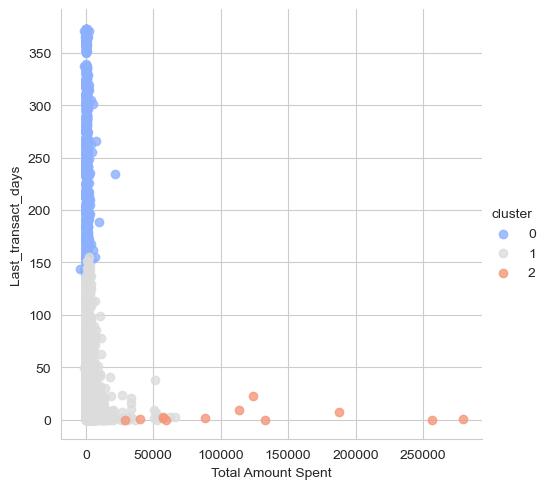

In [145]:
data['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='Total Amount Spent', y='Last_transact_days', data=data, hue='cluster', palette='coolwarm', height=5, aspect=1, fit_reg=False)
plt.show()

In [147]:
data

,CustomerID,Total Amount Spent,InvoiceNo,Last_transact,Last_transact_days,cluster
0,12346.0,0.00,2,325 days 02:33:00,325,0
1,12347.0,4310.00,182,1 days 20:58:00,1,1
2,12348.0,1797.24,31,74 days 23:37:00,74,1
3,12349.0,1757.55,73,18 days 02:59:00,18,1
4,12350.0,334.40,17,309 days 20:49:00,309,0
...,...,...,...,...,...,...
4367,18280.0,180.60,10,277 days 02:58:00,277,0
4368,18281.0,80.82,7,180 days 01:57:00,180,0
4369,18282.0,176.60,13,7 days 01:07:00,7,1
4370,18283.0,2094.88,756,3 days 00:48:00,3,1
